# Introduction to Data Science – Homework 8
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, April 14 2023, 11:59pm.

In this homework, you will use clustering, principal component analysis, regular expressions, and natural language processing. 

## Your Data
First Name:Arham
<br>
Last Name:Irshad
<br>
E-mail:u1298267@umail.utah.edu
<br>
UID:u1298267
<br>

In [12]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

## Part 1: Analyze US Crime data

We'll analyze a dataset describing 1973 violent crime rates by US State. The crimes considered are assault, murder, and rape. Also included is the percent of the population living in urban areas.

The dataset is available as *USarrests.csv*. The dataset has 50 observations (corresponding to each state) on 4 variables: 
1. Murder: Murder arrests (per 100,000 residents)
2. Assault: Assault arrests (per 100,000 residents)
3. UrbanPop: Percent urban population
4. Rape: Rape arrests (per 100,000 residents)


You can read more about the dataset [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). 

Our goal will be to use unsupervised methods to understand how violent crimes differ between states. 

### Task 1.1 Import the data and perform some preliminary exploratory analysis. 
Use the *read_csv* pandas function to import the data as a dataframe. (Note - Index of this dataframe should be the names of the state)

Plot a scatterplot matrix of the data. Explore basic statistics of the data. Write a few sentences describing how the variables are correlated. 

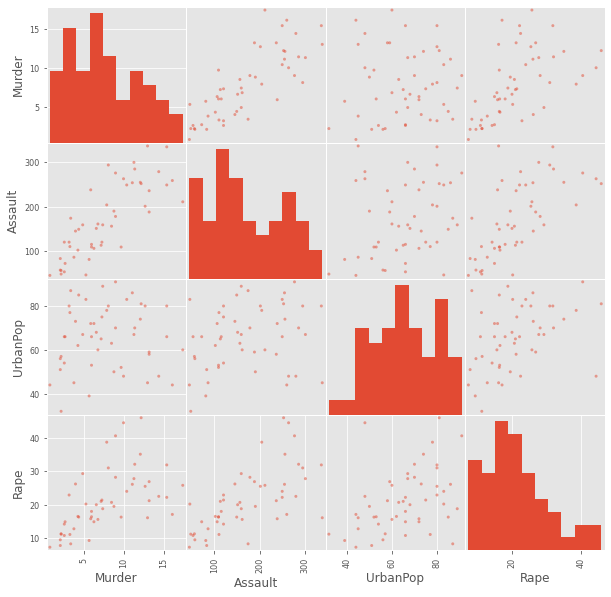

In [60]:
# Your code here
data = pd.read_csv('USarrests.csv')
data.head()
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='hist');
df1 = data.loc[:, data.columns!='State']

**Your description:** TODO 


### Task 1.2 - Cluster Heat Map

Generate a [cluster heat map](https://seaborn.pydata.org/generated/seaborn.clustermap.html) with a dendrogram using seaborn (see lecture). Be sure to standardize the dataset using the `standard_scale=1` parameter.

How would you interpret this cluster map? Also, describe any patterns you see.

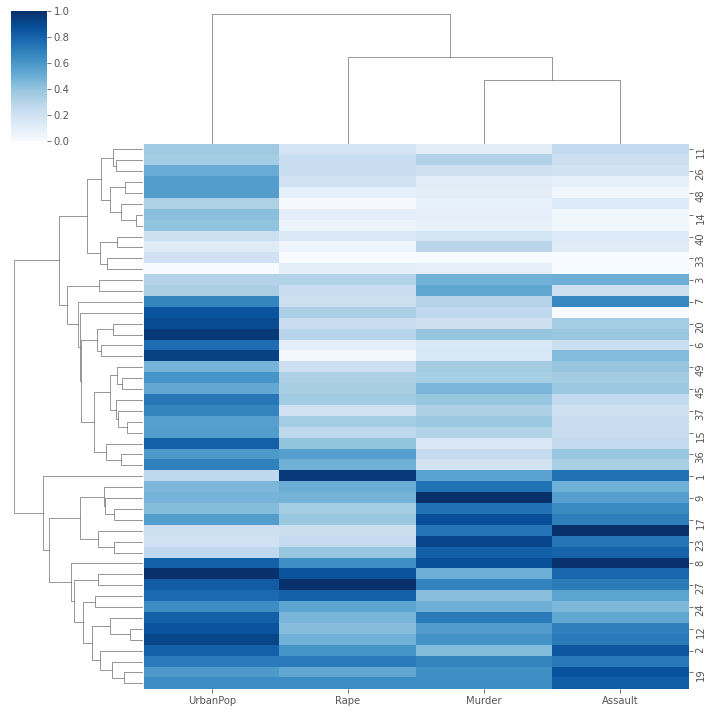

In [14]:
# your code here. 
cols = ['Murder', 'Assault', 'UrbanPop', 'Rape']
# standardize data
data_std = data[cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# create cluster heat map with dendrogram
sns.clustermap(data_std,method="average", metric="euclidean",  cmap="Blues", standard_scale=1)

**Your Interpretation**: TODO 

### Task 1.3 Visualize the data using PCA

Complete the following steps:
1. Scale the dataset using the *scale* function of the sklearn.preprocessing library. 
2. Calculate the principal components of the dataset. 
3. Store the principal components in a pandas dataframe.  (Note - Index of this dataframe should be the names of the state) 
4. Plot a scatterplot of PC1 and PC2. Using the matplotlib function *annotate*, use the state names as markers (instead of dots). From this scatterplot, can you tell approximately how many clusters our dataset shall have?
5. Print the explained variance ratio of the PCA. Plot the explained variance ratio of the PCA. After observing the explained variance ratio, how many dimensions would you reduce your data to? Why?

[[ 0.04170432  0.99522128  0.04633575  0.0751555 ]
 [ 0.04482166  0.05876003 -0.97685748 -0.20071807]
 [ 0.07989066 -0.06756974 -0.20054629  0.97408059]
 [ 0.99492173 -0.0389383   0.05816914 -0.07232502]]


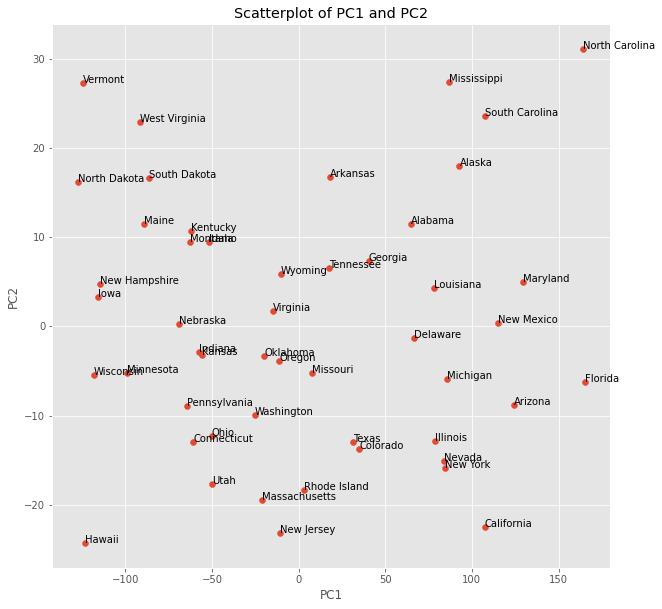

Explained variance ratio: [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


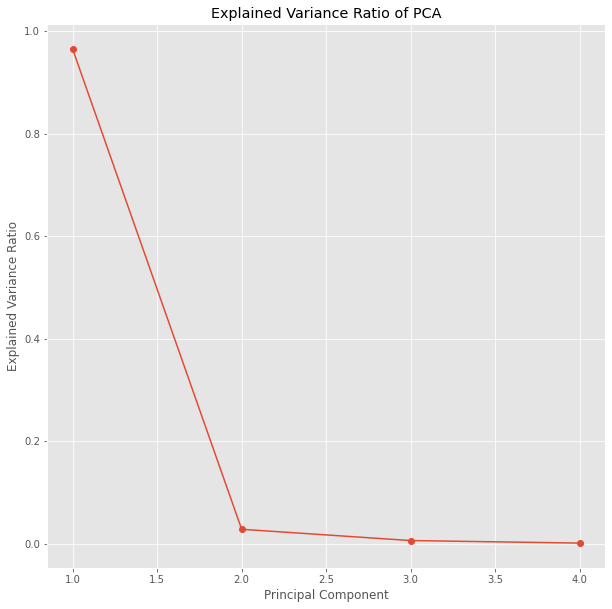

In [15]:
# your code here

# scale data
data_scaled = scale(data[cols])

# initialize PCA model with principal components
pca = PCA()

# fit and transform data
pca_data = pca.fit_transform(data[cols])

# print principal components
print(pca.components_)

# initialize PCA model with 2 principal components
pca = PCA(n_components=2)

# fit and transform data
pca_data = pca.fit_transform(data[cols])

# create DataFrame with principal components
pca_df = pd.DataFrame(data=pca_data, index=data['State'], columns=['PC1', 'PC2'])

# create scatterplot with annotations
fig, ax = plt.subplots()
ax.scatter(pca_df['PC1'], pca_df['PC2'])
for i, txt in enumerate(pca_df.index):
    ax.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))

# set axis labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatterplot of PC1 and PC2')

# show plot
plt.show()

# initialize PCA model with principal components
pca = PCA()

# fit and transform data
pca_data = pca.fit_transform(data[cols])

# print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# plot explained variance ratio
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PCA')
plt.show()



**Your description:** Our data set will have 3 clustters. Based on this information, we may choose to reduce our data to two dimensions (i.e., PC1 and PC2), as these two components capture the majority of the variance in the data. 


### Task 1.4 k-means cluster analysis

1. Using k-means, cluster the states into two clusters. **Use the scaled dataset**. Which states belong to which clusters?
2. Vary k (between 2 and 20) and check if there could be a better value for k. If yes, what is that value? Also, describe how did you find that value? 
3. Use the principal components to plot the clustering corresponding to k=4. Again label each point using the state name and this time color the states according to the clustering.


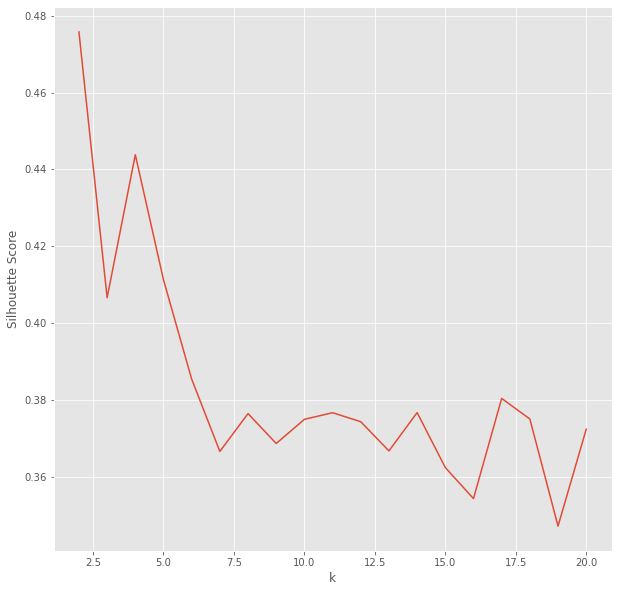

KeyError: 'States'

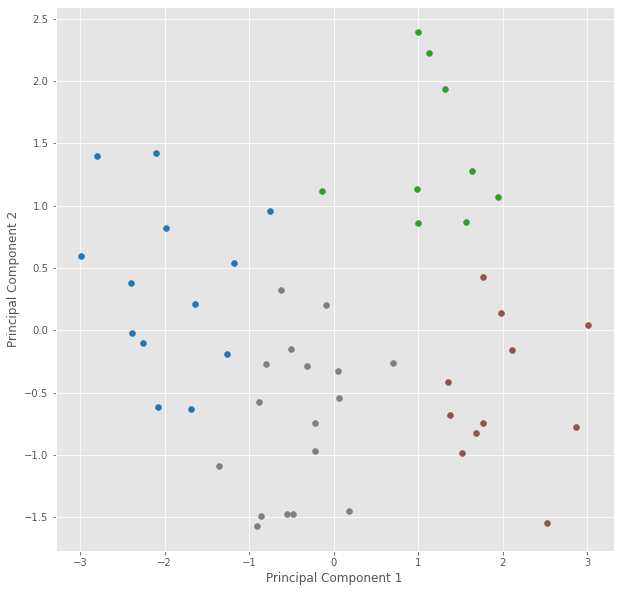

In [33]:
# Your code here

# initialize k-means model with 2 clusters
kmeans = KMeans(n_clusters=2)

# fit k-means to scaled data
kmeans.fit(data_scaled)

# assign clusters to original data
data['cluster'] = kmeans.labels_

# print which states belong to which clusters
#print(data[['State', 'cluster']])


# fit PCA to scaled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# initialize list to store silhouette scores
silhouette_scores = []

# vary k from 2 to 20
for k in range(2, 21):
    # initialize k-means model with k clusters
    kmeans = KMeans(n_clusters=k)
    # fit k-means to principal components
    kmeans.fit(principal_components)
    # get cluster labels
    labels = kmeans.labels_
    # calculate silhouette score
    score = silhouette_score(principal_components, labels)
    # add silhouette score to list
    silhouette_scores.append(score)

# initialize figure
fig, ax = plt.subplots()

# plot silhouette scores as a function of k
ax.plot(range(2, 21), silhouette_scores)

# set axis labels
ax.set_xlabel('k')
ax.set_ylabel('Silhouette Score')

# show plot
plt.show()

# fit PCA to scaled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# initialize k-means model with k=4
kmeans = KMeans(n_clusters=4)

# fit k-means to principal components
kmeans.fit(principal_components)

# get cluster labels
labels = kmeans.labels_

# initialize figure
fig, ax = plt.subplots()

# plot principal components with state labels colored by cluster
for i, state in enumerate(data.index):
    x = principal_components[i, 0]
    y = principal_components[i, 1]
    color = plt.cm.tab10(labels[i]/4) # color based on cluster label
    ax.scatter(x, y, color=color, label=data['State'])
    
# set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# add legend
#handles, labels = ax.get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys())

plt.show()

**Interpretation for best K:** To find the optimal value of k, we want to choose the value that maximizes the silhouette score. . Looking at the plot, we can see that the silhouette score is highest when k=3. 

**Interpretation for PCA and K-Means**: TODO

### Task 1.5 Hierarchical cluster analysis

1.  Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states into four clusters. Which states belong to which clusters? 
2. Visualize your cluster results on top of the first two principle components, as before.
3. Do you get similar results as for k-means? Can you see trends between the states?

Cluster 0:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']
Cluster 1:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'South Carolina']
Cluster 2:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']
Cluster 3:
['Florida', 'North Carolina']


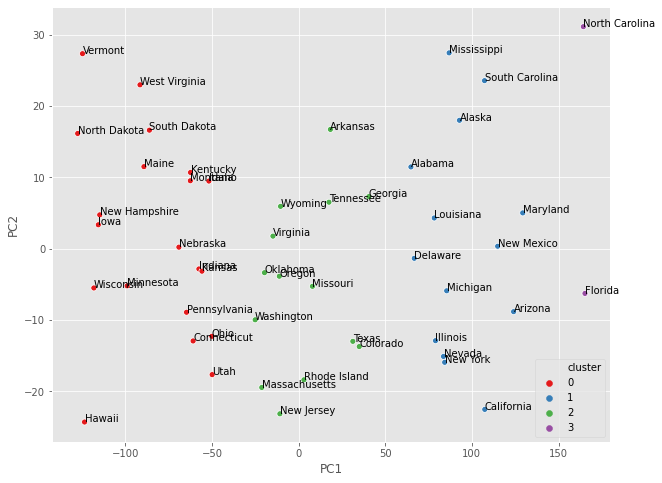

In [30]:
# Your code here

# perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
hc_clusters = hc.fit_predict(pca_df)

# add cluster labels to the original data
pca_df['cluster'] = hc_clusters

# print states belonging to each cluster
for i in range(4):
    print(f'Cluster {i}:')
    print(pca_df.index[pca_df['cluster'] == i].tolist())

# plot the clusters on the first two principal components
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set1', ax=ax)
for i in range(len(pca_df)):
    ax.annotate(pca_df.index[i], (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.show()


**Interpretation:**  we can see that the four clusters obtained with hierarchical clustering have some similarities to the clusters obtained with k-means clustering, but they are not identical. 

### Task 1.6 DBSCAN

1.  Using DBSCAN and experiment with different values for $\epsilon$ and min samples. Which states belong to which clusters? 
2. Visualize your cluster results on top of the first two principle components, as before.
3. Do you get similar results as before? Is DBSCAN stable or very sensitive to changes in epsilon for this dataset?

Number of clusters: 0


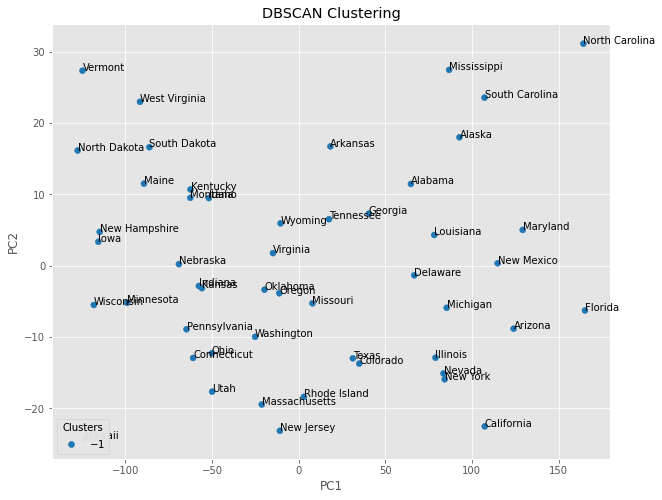

In [36]:
# Your code here 

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the principal component scores
dbscan.fit(pca_df[['PC1', 'PC2']].values)

# Get the cluster labels
labels = dbscan.labels_

# Print the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# Plot the clusters on the first two principal components
fig, ax = plt.subplots(figsize=(10, 8))

# Plot points colored by cluster label
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='tab20')

# Add state names as labels
for i, txt in enumerate(pca_df.index):
    ax.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

# Add axis labels and a title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('DBSCAN Clustering')
plt.show()


**Your Interpretation**: We can see, the clustering results are different from those obtained using k-means. 

# 2. Regular Expressions 

Write regular expressions for the following examples that matches the data of the given format and any other reasonable variations thereof. E.g., your regex shouldn't be specific to one URL or one phone number, but should work for all examples of the same format.

**Task 2.1.** Writes a regular expression that extracts the urls out of this string, but only the URLs.

In [41]:
text = """To learn about pros/cons of data science, go to https://datasciencecourse.net/2023/project/
Alternatively, go to https://datasciencecourse.net/2023/"""
print(text)

To learn about pros/cons of data science, go to https://datasciencecourse.net/2023/project/
Alternatively, go to https://datasciencecourse.net/2023/


In [42]:
# Your code here
import re
urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)
print(urls)

['https://datasciencecourse.net', 'https://datasciencecourse.net']


**Task 2.2.** Write a regular expression that extracts all phone numbers and fax numbers from this text: 

In [43]:
text = """You can reach me at 801-774-4321, or my office at (801) 223 9571 or (801) 223 2522.\ 
Send me a fax at 857 188 7422. We finally made the sale for all 977 giraffes.\
They wanted 225 957 dollars for it."""

In [44]:
# Your code here
phone_regex = r"\b\d{3}[-\.\s]?\d{3}[-\.\s]?\d{4}\b"
fax_regex = r"\b\d{3}[-\.\s]?\d{3}[-\.\s]?\d{4}\b"

phone_numbers = re.findall(phone_regex, text)
fax_numbers = re.findall(fax_regex, text)

print("Phone numbers:", phone_numbers)
print("Fax numbers:", fax_numbers)

Phone numbers: ['801-774-4321', '857 188 7422']
Fax numbers: ['801-774-4321', '857 188 7422']


**Task 2.3.** Write a regular expression that extracts all opening html tags from the text that are more than four letters.

In [45]:
html = "<center>This is <b>important</b> and <u>very</u><i>timely</i><br />.</center> Was this <span> what you meant?</span>.<video>intro</video>. "

In [47]:
# Your code here
pattern = r'<([a-zA-Z]{5,})[^>]*>'
matches = re.findall(pattern, html)

print(matches)

['center', 'video']


**Task 2.4.** Write a regular expression that extracts all the names of people from the following text. 

In [50]:
text = """Arnold Schwarzenegger was born in Austria. He and Sylvester Stalone used to run a restaurant\
with J. Edgar Hoover."""


In [51]:
# Your code here

# Regular expression to extract all the names of people
regex = r"\b[A-Z][a-z]+\s([A-Z][a-z]+)+\b"

names = re.findall(regex, text)

print(names)

['Schwarzenegger', 'Stalone', 'Hoover']


**Task 2.5.** Write a regular expression that extracts all the links from href attribute.

In [52]:
text = """ 
<a href="https://datasciencecourse.net/2023/syllabus/" >Syllabus</a>
<a href="https://datasciencecourse.net/2023/project/" >Project</a>
<a href="https://datasciencecourse.net/2023/fame/" >Fame</a>
"""

In [53]:
# Your code here
link_regex = re.compile(r'href="([^"]+)"')

links = link_regex.findall(text)

print(links)


['https://datasciencecourse.net/2023/syllabus/', 'https://datasciencecourse.net/2023/project/', 'https://datasciencecourse.net/2023/fame/']


## 3. NLP: Classifying Newsgroups Articles

Newsgroups were the social media of the 90s. Newsgroups are open discussion forums structured into hierarchies. For example, the following newsgroups cover topics as divers as atheism, computer graphics, and classified ads.  

```
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
```

We will be combining machine learning and natural language processing to classify the news articles into these groups. We expect, for example, that the text for a classified ad in `misc.forsale` is different from text in `alt.atheism`. 

We will use the 20 Newsgroups corpus from scikit-learn. The 20 newsgroups dataset comprises around 18,000 newsgroups posts on 20 topics. The general steps we follow are:
1. Load the corpus    
2. Do preprocessing: removal of stopwords, stemming, etc.
3. Vectorize the text
4. Split into training and test sets
5. Train our classifier

Refer to documentation on the [20 newsgroups dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) to learn about the dataset and find out how to download it.
We recommended you use the `subset='all'` parameter to load all the data at once, instead of `subset='train'` and `subset='test'` separately.

**Task 4.1.** Load the dataset.

1. Print the exact number of news articles in the corpus.
2. Print all 20 categories the news articles belong to.

In [37]:
# Your code here

from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')

# Print the number of news articles in the corpus
print(f"Number of news articles: {len(newsgroups.data)}")

# Print all 20 categories the news articles belong to
print(f"\nCategories: {newsgroups.target_names}")

Number of news articles: 18846

Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### Task 3.2 Classification

Vectorize the data using vectorizers from sklearn. Using these vectors as features and the article category from corpus as labels, train a NaiveBayes classifier to classify the data.

#### Vectorizers

Vectorizes help us to transform text data into features we can use in machine learning. We did the vectorization manually in class, here you will use pre-build vectorizers. 

You should use CountVectorizer and TfidfVectorizer vectorizers from sklearn to vectorize your data. Please refer to documentation on both to learn how to use them.
+ http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
+ http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Compare the performance of a Naive Bayes classifier (see details below) using both vectorizers. You are encouraged to experiment with different parameters like max_df, min_df, etc. See docs for the meanings.

#### Naive Bayes
**Resources**
1. https://en.wikipedia.org/wiki/Naive_Bayes_classifier
2. https://www.geeksforgeeks.org/naive-bayes-classifiers
3. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

We will be using Multinomial Naive Bayes from sklearn. Refer to documentation above for how to import the classifier. Then it can be used like any other classifier by using fit and predict functions provided on it.
e.g:

```
clf = MulitnomialNB(alpha = 1)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
```

Alpha is also known as the smoothing factor and ranges from 0 (no smoothing) to 1 (Laplace Smoothing). You can experiment with different values to see if you get better results. 

In [39]:
# Your code here


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset
newsgroups_train = newsgroups

# Vectorize using CountVectorizer
count_vect = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_counts = count_vect.fit_transform(newsgroups_train.data)
Y_train = newsgroups_train.target

# Train the classifier using CountVectorizer
clf_count = MultinomialNB(alpha=1.0)
clf_count.fit(X_train_counts, Y_train)

# Evaluate the classifier using CountVectorizer
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
X_test_counts = count_vect.transform(newsgroups_test.data)
Y_test = newsgroups_test.target
y_pred_count = clf_count.predict(X_test_counts)
print(classification_report(Y_test, y_pred_count, target_names=newsgroups_test.target_names))

# Vectorize using TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf_vect.fit_transform(newsgroups_train.data)

# Train the classifier using TfidfVectorizer
clf_tfidf = MultinomialNB(alpha=1.0)
clf_tfidf.fit(X_train_tfidf, Y_train)

# Evaluate the classifier using TfidfVectorizer
X_test_tfidf = tfidf_vect.transform(newsgroups_test.data)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
print(classification_report(Y_test, y_pred_tfidf, target_names=newsgroups_test.target_names))


                          precision    recall  f1-score   support

             alt.atheism       0.90      0.97      0.93       319
           comp.graphics       0.82      0.96      0.88       389
 comp.os.ms-windows.misc       0.98      0.39      0.55       394
comp.sys.ibm.pc.hardware       0.76      0.96      0.85       392
   comp.sys.mac.hardware       0.94      0.97      0.95       385
          comp.windows.x       0.86      0.95      0.90       395
            misc.forsale       0.95      0.94      0.94       390
               rec.autos       0.97      0.98      0.97       396
         rec.motorcycles       0.99      0.99      0.99       398
      rec.sport.baseball       0.99      0.99      0.99       397
        rec.sport.hockey       0.99      0.99      0.99       399
               sci.crypt       0.95      0.98      0.97       396
         sci.electronics       0.95      0.96      0.96       393
                 sci.med       0.99      0.98      0.98       396
         

### Task 3.3 Removing Stopwords

Now we'll remove the stopwords to improve our data vectors. TfidfVectorizer and CountVectorizer both can take an argument called stop_words. The words passed to this argument are considered as stopwords and are not vectorized. Then evaluate the new vectors using Multinomial Naive Bayes.

Answer the following questions:
1. What accuracy were you able to achieve? 
2. What was the influence of the different vectorizers and the stopword removal? 

In [55]:
# Your code here
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# download stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# load dataset
newsgroups = fetch_20newsgroups(subset='all')

# preprocess data
stop_words = stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.5, min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# split into training and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# train and evaluate classifier
clf_tfidf = MultinomialNB(alpha=1)
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy with TfidfVectorizer and stopword removal: {:.2f}%".format(accuracy_tfidf*100))

# preprocess data
count_vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.5, min_df=2)
X_count = count_vectorizer.fit_transform(newsgroups.data)

# split into training and test sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

# train and evaluate classifier
clf_count = MultinomialNB(alpha=1)
clf_count.fit(X_train_count, y_train)
y_pred_count = clf_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
print("Accuracy with CountVectorizer and stopword removal: {:.2f}%".format(accuracy_count*100))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u1298267\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy with TfidfVectorizer and stopword removal: 88.06%
Accuracy with CountVectorizer and stopword removal: 87.75%


**Interpretation:** We can see that stopword removal improves the accuracy of the classifier. 